In [1]:
plotHeight <- 6
options(repr.plot.width=10, repr.plot.height=plotHeight)

In [2]:
library(corrplot)
library(tidyverse)

corrplot 0.84 loaded
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [13]:
incidents <- read.csv('../data/processed/master-incidents.csv', stringsAsFactors=FALSE) %>% 
    mutate(Date = as.Date(BeginDateTime))

demographics <- read.csv('../data/processed/neighborhood-demographics.csv', stringsAsFactors=FALSE)
for(colName in colnames(demographics)[3:21]) {
    demographics[paste0('Prop', colName)] <- demographics[colName] / demographics['Population']
}

head(demographics)

Neighborhood,Population,AgeU5,Age5To9,Age10To14,Age15To17,Age18To19,Age20To24,Age25To34,Age35To44,⋯,PropAge55To64,PropAge65To74,PropAge75To79,PropAge80To84,PropAgeO85,PropMale,PropFemale,PropWhite,PropColored,PropHispanic
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MID - CITY INDUSTRIAL,213,0,0,1,1,2,35,85,37,⋯,0.0751173709,0.0140845070,0.0046948357,0.0000000000,0.0000000000,0.5446009,0.4553991,0.8873239,0.08920188,0.02347418
UNIVERSITY OF MINNESOTA,5421,3,2,0,11,3500,1806,79,3,⋯,0.0007378712,0.0007378712,0.0003689356,0.0001844678,0.0007378712,0.5117137,0.4882863,0.8179303,0.15827338,0.02379635
NORTHEAST PARK,672,42,43,29,14,15,68,155,106,⋯,0.0818452381,0.0431547619,0.0133928571,0.0104166667,0.0074404762,0.5342262,0.4657738,0.6636905,0.20833333,0.12797619
BELTRAMI,1248,96,95,65,51,35,184,285,157,⋯,0.0657051282,0.0192307692,0.0064102564,0.0040064103,0.0048076923,0.5200321,0.4799679,0.4919872,0.32371795,0.18429487
DOWNTOWN EAST,1254,135,48,30,26,18,118,340,159,⋯,0.1212121212,0.0510366826,0.0063795853,0.0023923445,0.0015948963,0.4912281,0.5087719,0.6594896,0.29904306,0.04146730
KENWOOD,1468,70,102,122,74,19,60,101,180,⋯,0.1737057221,0.0837874659,0.0217983651,0.0190735695,0.0074931880,0.4986376,0.5013624,0.9080381,0.06198910,0.02997275


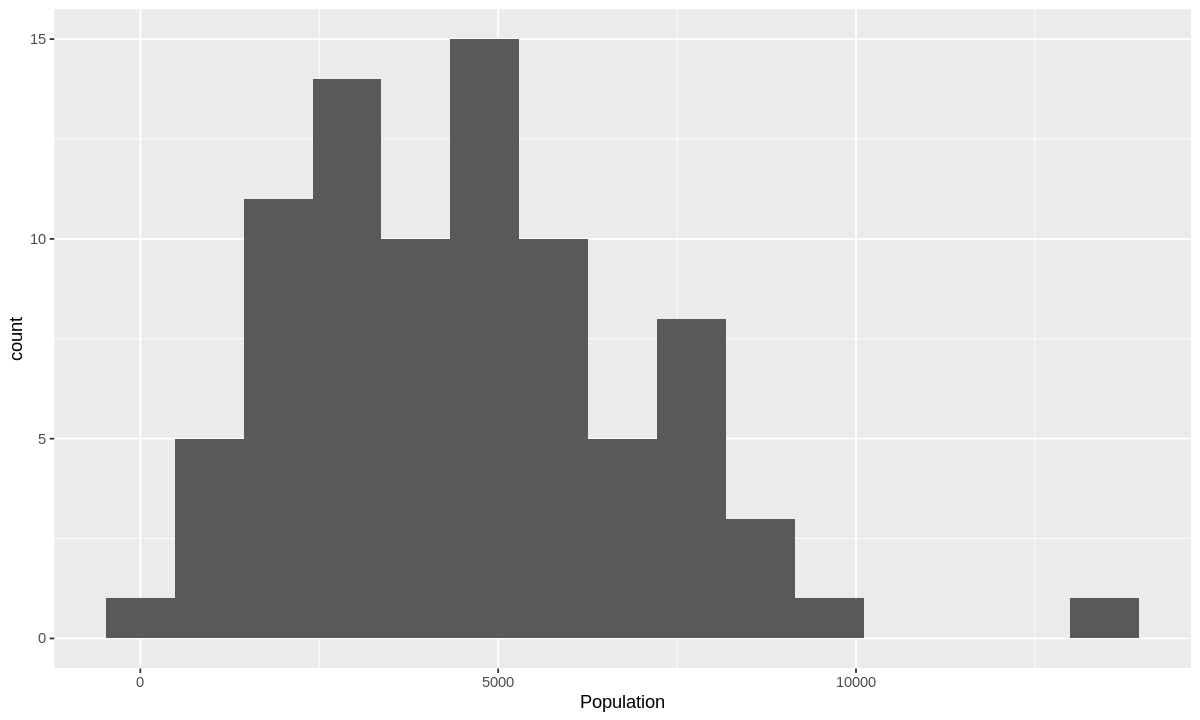

In [4]:
ggplot(demographics) +
    geom_histogram(aes(Population), bins=15)

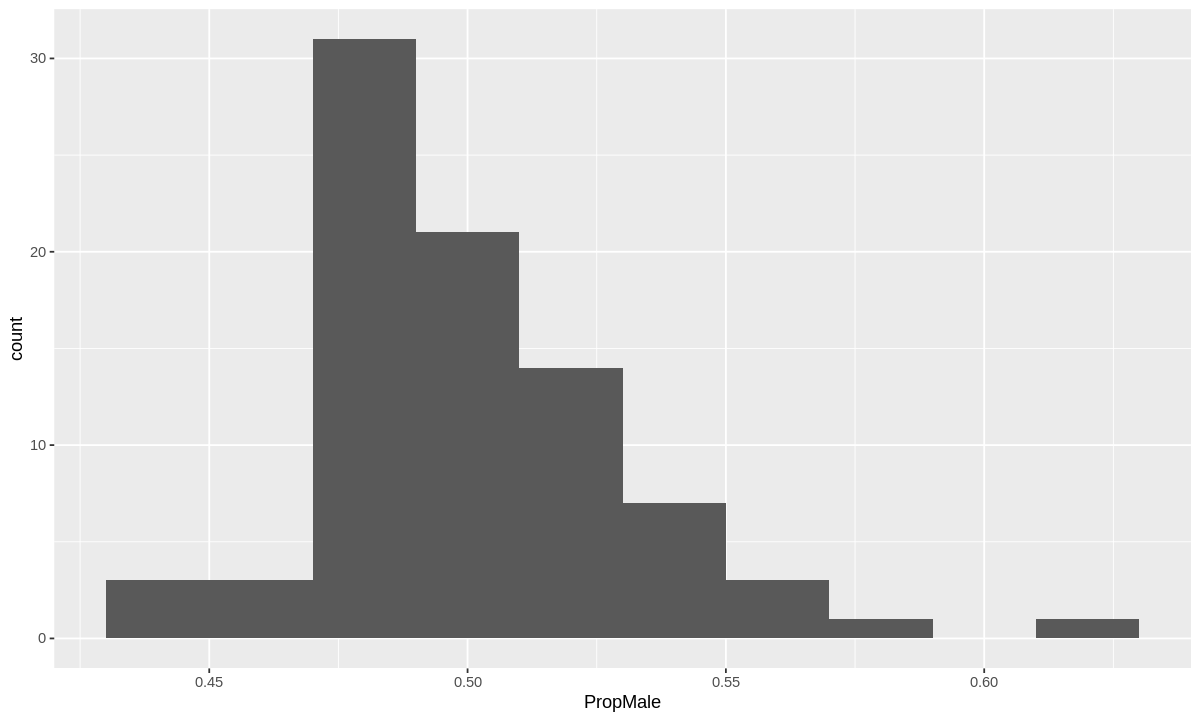

In [5]:
ggplot(demographics) +
    geom_histogram(aes(PropMale), binwidth=0.02)

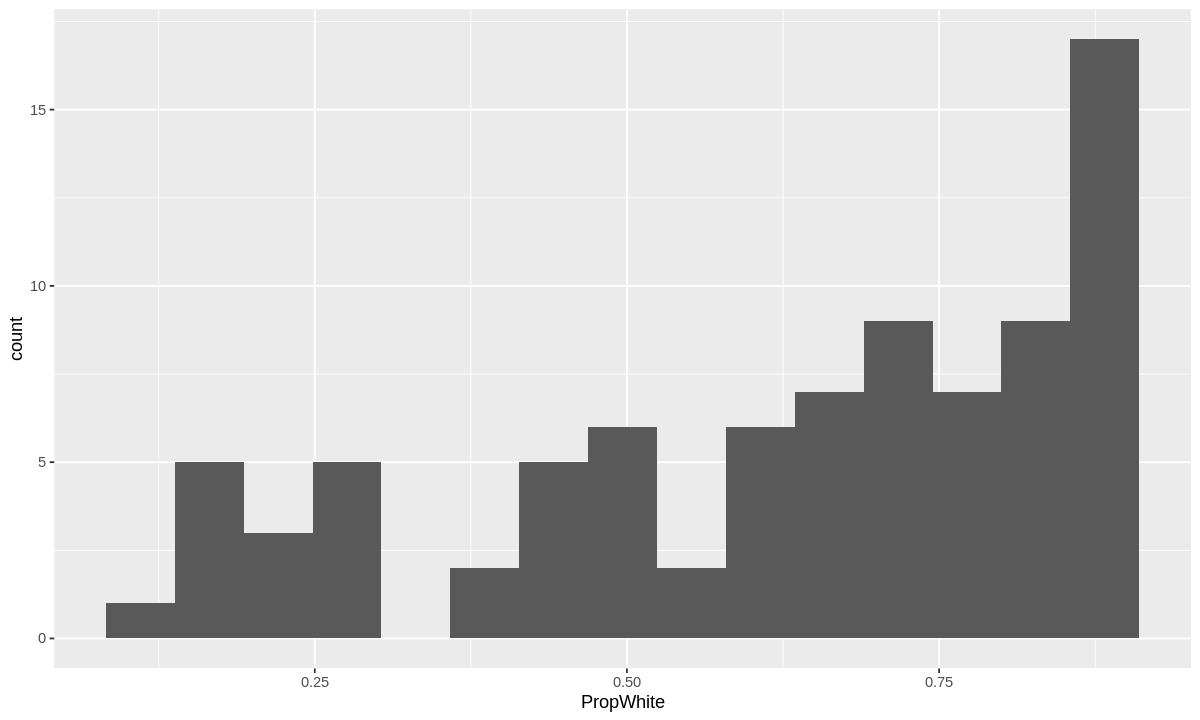

In [6]:
ggplot(demographics) +
    geom_histogram(aes(PropWhite), bins=15)

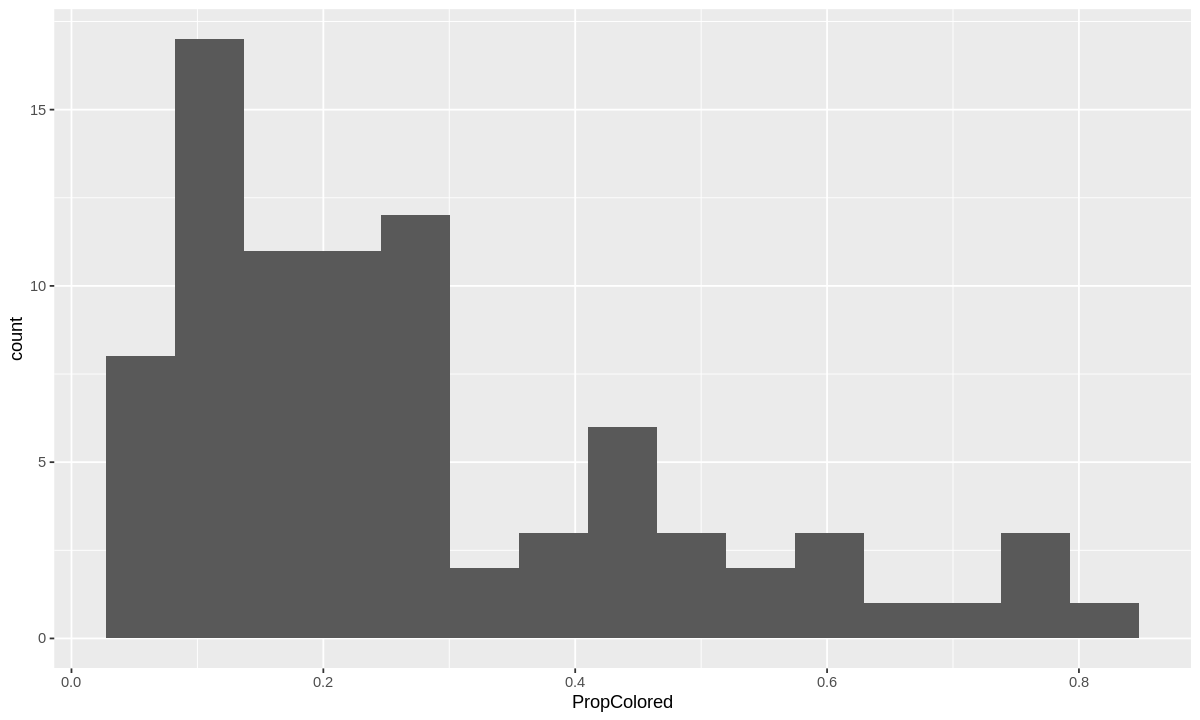

In [7]:
ggplot(demographics) +
    geom_histogram(aes(PropColored), bins=15)

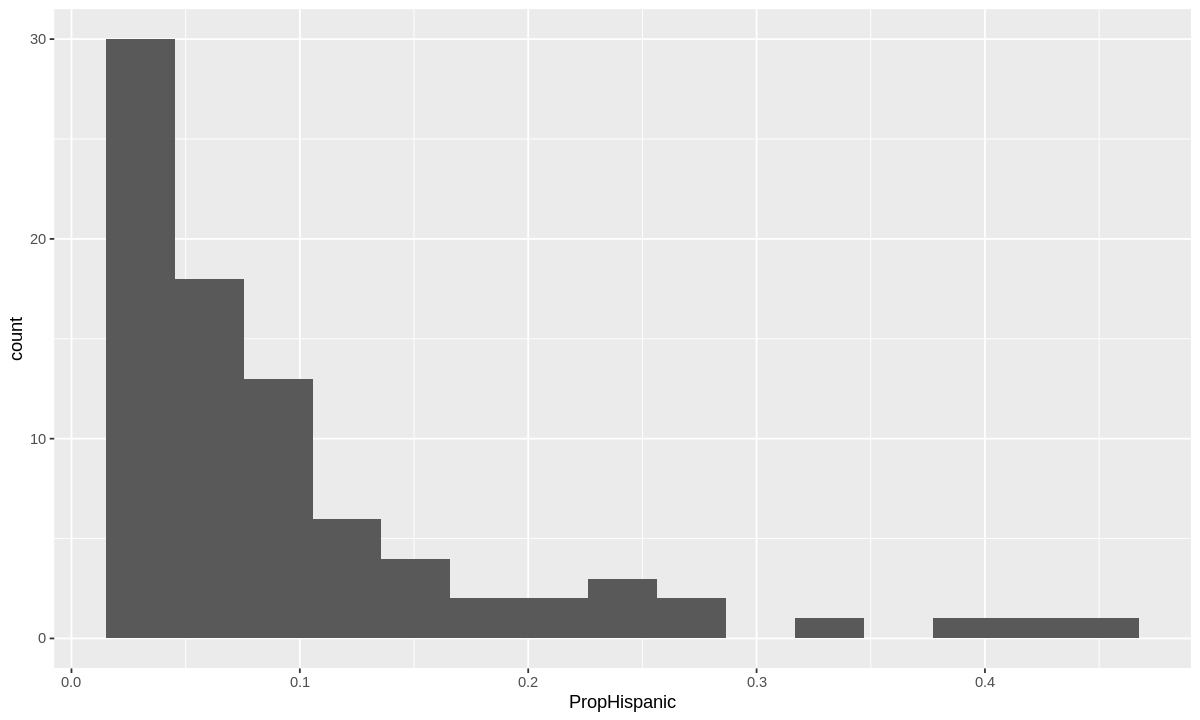

In [8]:
ggplot(demographics) +
    geom_histogram(aes(PropHispanic), bins=15)

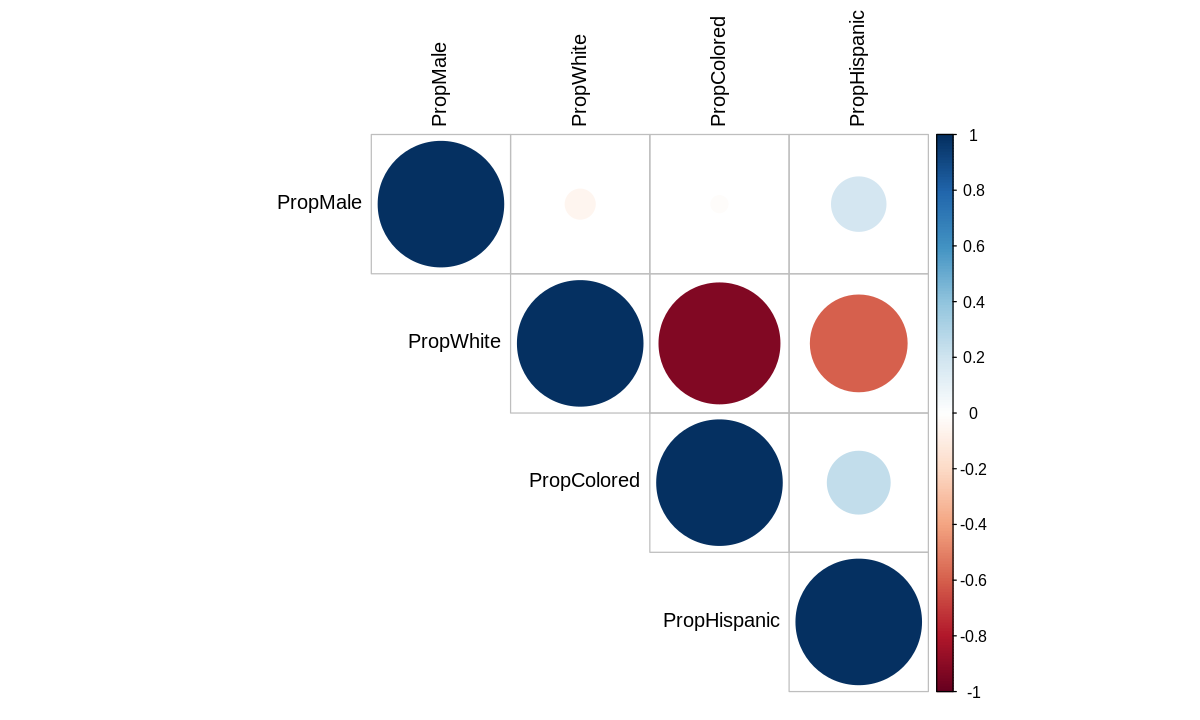

In [12]:
corrSubset <- demographics[c('PropMale', 'PropWhite', 'PropColored', 'PropHispanic')]
corrplot(cor(corrSubset), tl.col = "black", type='upper')

In [30]:
neighborhoodIncidents <- incidents %>% 
    count(Neighborhood) %>% 
    rename(Incidents = n) %>% 
    inner_join(demographics)
head(neighborhoodIncidents)

Joining, by = "Neighborhood"


Neighborhood,Incidents,Population,AgeU5,Age5To9,Age10To14,Age15To17,Age18To19,Age20To24,Age25To34,⋯,PropAge55To64,PropAge65To74,PropAge75To79,PropAge80To84,PropAgeO85,PropMale,PropFemale,PropWhite,PropColored,PropHispanic
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARMATAGE,737,4859,375,302,235,143,74,187,953,⋯,0.11422103,0.04610002,0.020786170,0.016670097,0.023050010,0.4696440,0.5303560,0.8158057,0.1457090,0.03848529
AUDUBON PARK,1531,4962,419,286,192,124,81,283,1161,⋯,0.10298267,0.03325272,0.013502620,0.009875050,0.011487304,0.4875050,0.5124950,0.7898025,0.1295848,0.08061266
BANCROFT,1171,3371,268,219,191,119,58,163,728,⋯,0.11865915,0.03886087,0.009196084,0.009789380,0.003856422,0.4728567,0.5271433,0.6113913,0.2678730,0.12073569
BELTRAMI,575,1248,96,95,65,51,35,184,285,⋯,0.06570513,0.01923077,0.006410256,0.004006410,0.004807692,0.5200321,0.4799679,0.4919872,0.3237179,0.18429487
BOTTINEAU,862,1656,178,143,123,45,44,143,377,⋯,0.06099034,0.03200483,0.007850242,0.009661836,0.006642512,0.4927536,0.5072464,0.4541063,0.4504831,0.09541063
BRYANT,904,2833,290,223,190,114,89,191,613,⋯,0.07942111,0.03282739,0.014119308,0.007059654,0.008824568,0.4920579,0.5079421,0.3010942,0.4147547,0.28415108


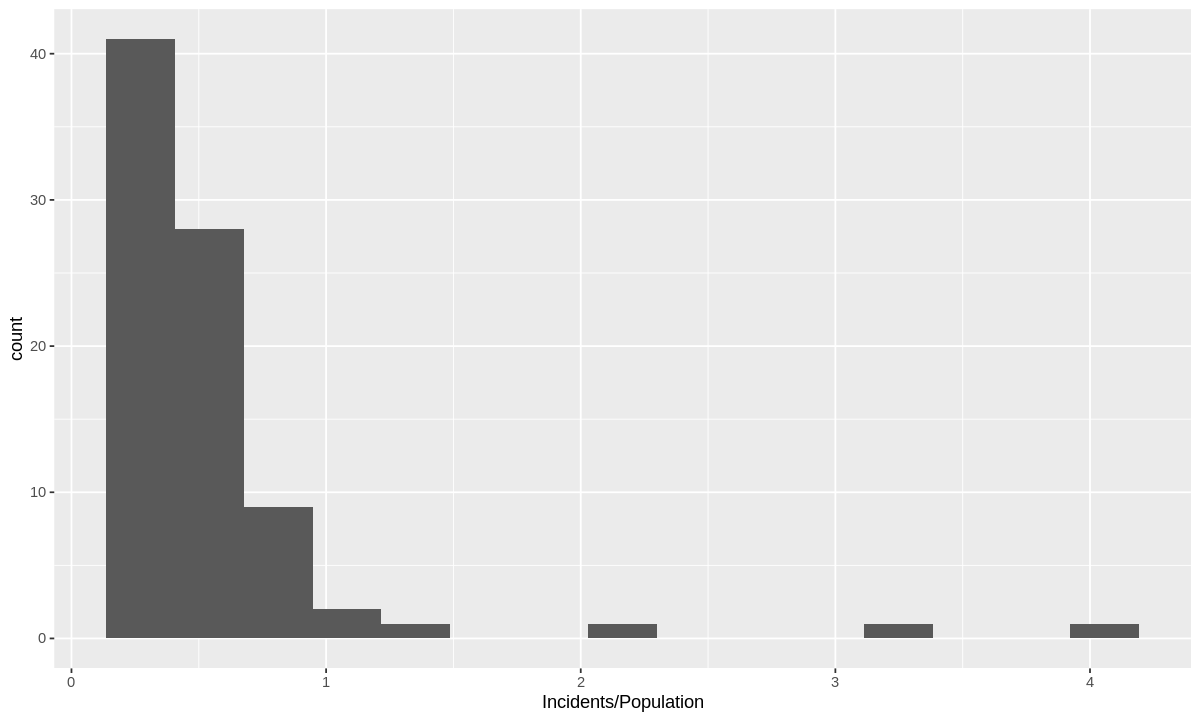

In [20]:
ggplot(neighborhoodIncidents) +
    geom_histogram(aes(Incidents / Population), bins=15)

In [23]:
neighborhoodIncidents %>% 
    filter(Incidents / Population > 1)

Neighborhood,Incidents,Population,AgeU5,Age5To9,Age10To14,Age15To17,Age18To19,Age20To24,Age25To34,⋯,PropAge55To64,PropAge65To74,PropAge75To79,PropAge80To84,PropAgeO85,PropMale,PropFemale,PropWhite,PropColored,PropHispanic
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DOWNTOWN EAST,1511,1254,135,48,30,26,18,118,340,⋯,0.12121212,0.05103668,0.006379585,0.002392344,0.001594896,0.4912281,0.5087719,0.6594896,0.29904306,0.04146730
DOWNTOWN WEST,22764,5781,86,25,14,20,92,675,1854,⋯,0.11831863,0.05120221,0.015222280,0.013838436,0.007957101,0.6275731,0.3724269,0.6007611,0.36031828,0.03892060
HAWTHORNE,4642,4567,540,497,438,290,171,375,659,⋯,0.06897307,0.02518064,0.007225750,0.002627545,0.003065470,0.4889424,0.5110576,0.1615940,0.74994526,0.08846070
LONGFELLOW,6096,4901,339,269,216,130,90,314,996,⋯,0.12711691,0.05223424,0.015302999,0.010610080,0.012854519,0.4892879,0.5107121,0.6192614,0.24076719,0.13997143
MID - CITY INDUSTRIAL,714,213,0,0,1,1,2,35,85,⋯,0.07511737,0.01408451,0.004694836,0.000000000,0.000000000,0.5446009,0.4553991,0.8873239,0.08920188,0.02347418
NORTHEAST PARK,1450,672,42,43,29,14,15,68,155,⋯,0.08184524,0.04315476,0.013392857,0.010416667,0.007440476,0.5342262,0.4657738,0.6636905,0.20833333,0.12797619


In [31]:
glm(Incidents~1, family=poisson, offset=log(Population), data=neighborhoodIncidents)


Call:  glm(formula = Incidents ~ 1, family = poisson, data = neighborhoodIncidents, 
    offset = log(Population))

Coefficients:
(Intercept)  
    -0.6372  

Degrees of Freedom: 83 Total (i.e. Null);  83 Residual
Null Deviance:	    94700 
Residual Deviance: 94700 	AIC: 95480